## • Learn to handle missing values
## • Learn to fit a decision tree and compare its accuracy with random forest classifier.

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading data from file into dataframe

df=pd.read_csv(r"./datasets/horse.csv")

In [3]:
df.head(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,...,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [5]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


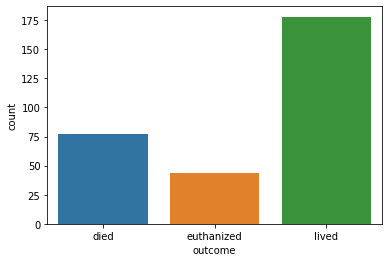

In [6]:
sns.countplot(df['outcome'])
plt.show()

#### The classes are imbalanced so the prediction will be biased.

In [7]:
## Columns with null/Nan values
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [8]:
## apply get dummies function for encoding
df_result = pd.get_dummies(df,drop_first=True)

In [9]:
sorted(df_result.columns)

['abdomen_distend_small',
 'abdomen_firm',
 'abdomen_normal',
 'abdomen_other',
 'abdominal_distention_none',
 'abdominal_distention_severe',
 'abdominal_distention_slight',
 'abdomo_appearance_cloudy',
 'abdomo_appearance_serosanguious',
 'abdomo_protein',
 'age_young',
 'capillary_refill_time_less_3_sec',
 'capillary_refill_time_more_3_sec',
 'cp_data_yes',
 'hospital_number',
 'lesion_1',
 'lesion_2',
 'lesion_3',
 'mucous_membrane_bright_red',
 'mucous_membrane_dark_cyanotic',
 'mucous_membrane_normal_pink',
 'mucous_membrane_pale_cyanotic',
 'mucous_membrane_pale_pink',
 'nasogastric_reflux_more_1_liter',
 'nasogastric_reflux_none',
 'nasogastric_reflux_ph',
 'nasogastric_tube_significant',
 'nasogastric_tube_slight',
 'outcome_euthanized',
 'outcome_lived',
 'packed_cell_volume',
 'pain_depressed',
 'pain_extreme_pain',
 'pain_mild_pain',
 'pain_severe_pain',
 'peripheral_pulse_increased',
 'peripheral_pulse_normal',
 'peripheral_pulse_reduced',
 'peristalsis_hypermotile',
 'peri

In [10]:
df_result

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,outcome_euthanized,outcome_lived,surgical_lesion_yes,cp_data_yes
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,...,0,0,0,0,0,0,0,0,0,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,...,0,0,0,1,1,0,1,0,0,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,...,0,0,1,0,0,0,0,1,0,1
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,0,0,1,0,0,1,1
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,...,0,0,0,0,0,0,1,0,0,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,...,1,0,0,0,0,1,1,0,1,1
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,...,0,0,0,0,0,0,0,0,1,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,...,1,0,0,0,0,1,0,1,1,1


In [11]:
df_result.isnull().sum()

hospital_number                       0
rectal_temp                          60
pulse                                24
respiratory_rate                     58
nasogastric_reflux_ph               246
packed_cell_volume                   29
total_protein                        33
abdomo_protein                      198
lesion_1                              0
lesion_2                              0
lesion_3                              0
surgery_yes                           0
age_young                             0
temp_of_extremities_cool              0
temp_of_extremities_normal            0
temp_of_extremities_warm              0
peripheral_pulse_increased            0
peripheral_pulse_normal               0
peripheral_pulse_reduced              0
mucous_membrane_bright_red            0
mucous_membrane_dark_cyanotic         0
mucous_membrane_normal_pink           0
mucous_membrane_pale_cyanotic         0
mucous_membrane_pale_pink             0
capillary_refill_time_less_3_sec      0


### 3. Replace the missing values by the most frequent value in each column.
[Hint: Refer to Imputer class in Scikit learn preprocessing module]

In [12]:
cols = ["rectal_temp", "pulse","respiratory_rate","nasogastric_reflux_ph","packed_cell_volume","total_protein","abdomo_protein"]
df_result[cols]=df_result[cols].fillna(df_result.mode().iloc[0])

In [13]:
df_result.isnull().sum()

hospital_number                     0
rectal_temp                         0
pulse                               0
respiratory_rate                    0
nasogastric_reflux_ph               0
packed_cell_volume                  0
total_protein                       0
abdomo_protein                      0
lesion_1                            0
lesion_2                            0
lesion_3                            0
surgery_yes                         0
age_young                           0
temp_of_extremities_cool            0
temp_of_extremities_normal          0
temp_of_extremities_warm            0
peripheral_pulse_increased          0
peripheral_pulse_normal             0
peripheral_pulse_reduced            0
mucous_membrane_bright_red          0
mucous_membrane_dark_cyanotic       0
mucous_membrane_normal_pink         0
mucous_membrane_pale_cyanotic       0
mucous_membrane_pale_pink           0
capillary_refill_time_less_3_sec    0
capillary_refill_time_more_3_sec    0
pain_depress

### 4. Fit a decision tree classifier and observe the accuracy.

In [14]:
x_col = df_result.columns.to_list()
x_col.remove('outcome_euthanized')
x_col.remove('outcome_lived')
x_col.remove('nasogastric_reflux_ph')
x_col.remove('hospital_number')
x_col.remove('abdomo_protein')

In [15]:
y_col = ["outcome_euthanized","outcome_lived"]

In [16]:
X = df_result[x_col]
Y = df_result[y_col]

In [17]:
## importing test train split package
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=48)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239, 48) (60, 48) (239, 2) (60, 2)


In [25]:
## importing Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier(criterion = "gini",random_state = 48,max_depth=3, min_samples_leaf=5)

In [27]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=48)

In [28]:
y_pred = dt.predict(X_test)

In [29]:
## importing accuracy functions
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
print(f"Decision Tree has accuracy score of {round(accuracy_score(y_test, y_pred),3)}")

Decision Tree has accuracy score of 0.633


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.61      0.88      0.72        32

   micro avg       0.61      0.76      0.67        37
   macro avg       0.30      0.44      0.36        37
weighted avg       0.53      0.76      0.62        37
 samples avg       0.47      0.47      0.47        37



In [32]:
from sklearn import tree

In [33]:
## Visualizing the tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 50.50
|   |--- feature_5 <= 900.00
|   |   |--- class: 0
|   |--- feature_5 >  900.00
|   |   |--- feature_18 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_18 >  0.50
|   |   |   |--- class: 0
|--- feature_3 >  50.50
|   |--- feature_4 <= 9.55
|   |   |--- feature_5 <= 5158.00
|   |   |   |--- class: 0
|   |   |--- feature_5 >  5158.00
|   |   |   |--- class: 1
|   |--- feature_4 >  9.55
|   |   |--- feature_2 <= 22.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  22.00
|   |   |   |--- class: 1



### 5. Fit a random forest classifier and observe the accuracy.

In [34]:
## importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(n_estimators = 80, random_state = 48) 

In [78]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=48)

In [79]:
y_pred_rf = rf.predict(X_test)

In [80]:
print(f"Random Forest Model has accuracy score of {round(accuracy_score(y_test, y_pred_rf),3)}")

Random Forest Model has accuracy score of 0.7


In [82]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.78      0.78      0.78        32

   micro avg       0.78      0.68      0.72        37
   macro avg       0.39      0.39      0.39        37
weighted avg       0.68      0.68      0.68        37
 samples avg       0.42      0.42      0.42        37



### Random Forest model has much better accurancy as compaired to Decision Tree.